# Detector Resolution

### Learning Goals
* See that you can use $\sigma$ as a measure of resolution even for distributions that are not Gaussian.

* Learn how to write a simple Monte Carlo, and use it to reproduce an analytical result.

* Understand what position resolution means using a silicon strip detector as an example.

* Demonstrate that you can use simulation to solve problems that are more complicated than what can be done analytically.

* Learn how noise affects measurements for a simple case. 

## 1. Measurement Uncertainties

The [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) tells us  that 
the distribution of the sum (or average) of a large number of independent, identically 
distributed measurements will be approximately normal, regardless of the underlying distribution
(subject to the condition that mean and variance of the underlying distribution are not infinite).
We'll see how this works for the simplest pdf ([probability density function](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-continuous/v/probability-density-functions)), a random variable $x$ uniformly distributed:

$$f(x) = \begin{cases} \frac{1}{b-a} &\mbox{if } a \leq x \leq b \\ 
0 & \mbox{otherwise} \end{cases} $$

**a)**  Calculate the mean ($\mu$) and variance ($\sigma^2$) of the above distribution.

**Answer**

$$\begin{align*}
    \mu &= \int x \ f(x) \ dx\\
        &= \int_a^b \frac{x}{b - a} dx\\
        &=\frac{1}{b -a} \Big(\frac{b^2 - a^2}{2}\Big)\\
        &= \frac{b + a}{2},       
\end{align*}$$

\begin{align*}
    \sigma^2 &= \int (x - \mu)^2 \ f(x) \ dx\\
             &= \frac{1}{b-a} \int_a^b (x - \mu)^2 dx \\
             &= \frac{1}{b-a} \Big( \frac{(b - \mu)^3}{3} - \frac{(a - \mu)^3}{3}\Big)\\
             &= \frac{1}{b-a} \Big( \frac{(b/2 - a/2)^3}{3} - \frac{(a/2 - b/2)^3}{3}\Big)\\
             &= \frac{1}{b-a} \frac{2(b/2 - a/2)^3}{3} \\
             &= \frac{1}{b-a} \frac{1}{12} (b-a)^3\\
             &= \frac{(b-a)^2}{12}.
\end{align*}

**(b)** Let $a=0$ and $b=1$. Using your favorite random number generator, generate 1000 random numbers from the uniform distribution, $f(x)$.  Calculate the mean and sigma of the numbers you have generated and verify that the results are consistent with your result from  part (a).

**Answer** With $a = 0$ and $b=1$, our analytical result from above gives $\mu = \frac{1}{2}$ and $\sigma = \frac{1}{\sqrt{12}}$.  We can reproduce this result numerically using the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method).  The heart of every Monte Carlo algorithm is a random number generator.  We use it to generate random samples from some probability distribution, and then use these in a (sometimes) clever way to solve a problem.

For example, suppose you don't know how to set-up or solve the integrals above, but you know how to find the mean and variance of a list of numbers.  Let's use the **NumPy** (**Num**erical **Py**thon) library to demonstrate.

In [1]:
#Import the NumPy library as "np"
import numpy as np

#Create a list of numbers
some_numbers = [1,2,3,4,5]

Lucky for us, NumPy has lots of useful built-in functions and methods.  We could write our own functions to find the mean and variance,

In [2]:
def find_mean(num_list):
    return sum(num_list)/len(num_list)

def find_variance(num_list):
    mean = find_mean(num_list)
    return sum((num - mean)**2 for num in num_list)/len(num_list)

print(find_mean(some_numbers), find_variance(some_numbers))

3.0 2.0


or we could just use the ones provided by NumPy:

In [3]:
print(np.mean(some_numbers), np.var(some_numbers))

3.0 2.0


Now, back to our original problem, we need a list of 1000 random numbers sampled from (0,1) uniformly.  NumPy can do this too:

In [4]:
#Use NumPy to generate a list (it's actually a numpy.ndarray) of 1000 random numbers
samples = np.random.rand(1000)

#Print the first 10 random numbers
print(samples[0:10])

[ 0.85614024  0.83702843  0.50957298  0.13908601  0.08981951  0.74865392
  0.19311742  0.47087399  0.61487209  0.43537263]


We can then calculate $\mu$ and $\sigma$ of this random list and compare it against the analytical result.

In [5]:
mean, variance = np.mean(samples), np.var(samples)
sigma = np.sqrt(variance)

print("mean, sigma = {0:.3f}, {1:.3f} using a Monte Carlo method".format(mean, sigma))
print("mean, sigma = {0:.3f}, {1:.3f} using an analytical method".format(0.5, 1/np.sqrt(12)))


mean, sigma = 0.492, 0.288 using a Monte Carlo method
mean, sigma = 0.500, 0.289 using an analytical method


**(c)** Make a histogram  with 100 bins where the lower edge of the first bin is at $x=0$ and the upper
edge of the last is at $x=1$.  Fill your histogram with the random numbers you generated in part (b).

**Answer** We'll use the **matplotlib.pyplot** module to make several histograms throughout the assignment, so we should go ahead and import it now.  Making a histogram from a list of numbers is as simple as calling [plt.hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html), with the list as the input parameter.  There are many optional parameters, like the number of bins and the color of the bars.

Since our histograms will share similar formatting, it's also useful to define a function rather than typing the same thing over and over.

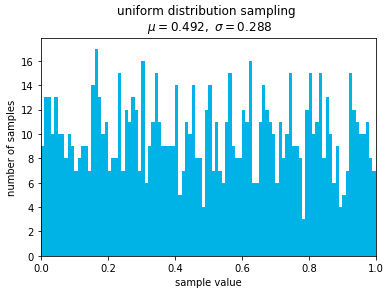

In [6]:
#Import the pyplot module of matplotlib as "plt"
import matplotlib.pyplot as plt


#Makes a histogram filled with the random numbers we generate
def plot_histogram(samples):
    
    #It would be nice to have the mean and standard deviation in the title, so let's get these
    mean, sigma = np.mean(samples), np.sqrt(np.var(samples))
    
    #Plot the histogram of the sampled data with 100 bins and a nice color
    plt.hist(samples, bins=100, range=(0,1), color=(0,0.7,0.9))

    #Add some axis labels and a descriptive title
    plt.xlabel('sample value')
    plt.ylabel('number of samples')
    plt.title('uniform distribution sampling \n $\mu={0:.3f},\ \sigma={1:.3f}$'.format(mean,sigma) )

    #Get rid of the extra white space on the left/right edges (you can delete these two lines without a problem)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([0,1,ymin,ymax])

    #Not necessarily needed in a Jupyter notebook, but it doesn't hurt
    plt.show()
    
    
#Call the function we just wrote
plot_histogram(samples)

**(d)** Now suppose you make an ensemble of 1000 pseudoexperiments where each pseduoexperiment consists of $N$
uniformly distributed random numbers.  For each pseudoexperiment, define the measurement $S$ to be
$$
S \equiv \frac{1}{N} \sum_1^N x_i
$$
Make histograms of $S$ with the same $x-$axis as in part (c) for the cases $N=2$, $N=5$
and $N=10$.  Determine the mean and the $\sigma$ of the distributions displayed in
these histograms.  In each case, compare the
$\sigma$ you obtain to what you would predict if you assumed the experiments followed a normal distribution.

**Answer**

In [7]:
#Calculates and returns S as defined above
def pseudoexperiment(N):
    samples = np.random.rand(N)  #samples = [x_1, x_2, ... x_N]
    s = np.sum(samples)/N
    return s

#Performs each pseudoexperiment 1000 times and plot a histogram of the results
def run_pseudoexperiments(N):
    s_list = []
    for i in range(1000):
        s_list.append(pseudoexperiment(N))
    plot_histogram(s_list)

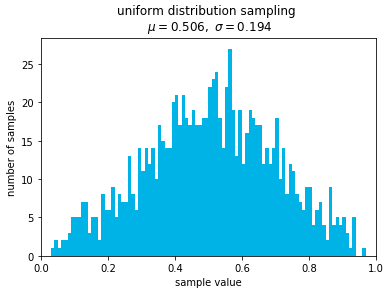

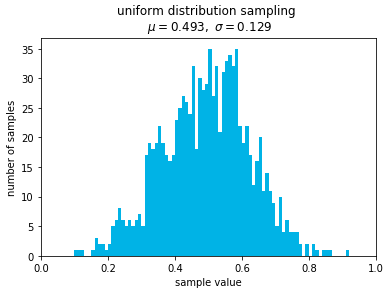

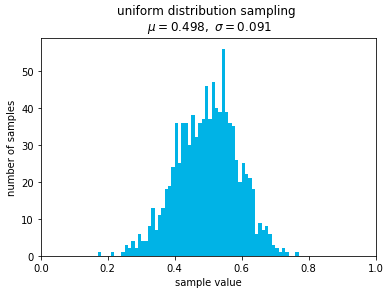

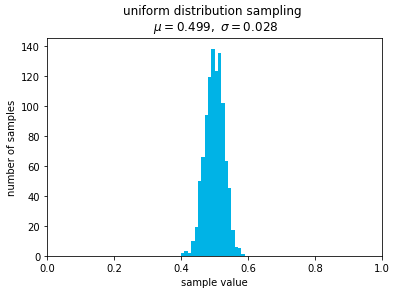

In [8]:
for N in [2,5,10,100]:
    run_pseudoexperiments(N)

According to the central limit theorem, we'd expect the standard deviation $\sigma_N$ to go as $\sigma_{u}/\sqrt{N}$,
where $$\sigma_u = \frac{1}{\sqrt{12}}$$ is the standard deviation of the (0,1) uniform distribution.  

In [9]:
print("N \t \u03C3")
for N in [2,5,10,100]:
    print("{0} \t {1:.3f}".format(N,np.sqrt(1/12)/np.sqrt(N)))

N 	 σ
2 	 0.204
5 	 0.129
10 	 0.091
100 	 0.029


## 2. Silicon Detector Position Resolution: Analytic Calculation

In this problem and the next we will study how the position resolution of a detector depends upon the properties of that detector. For our example, we will consider a silicon micro-strip detector. We will describe our detector as a plane segmented into strips, each of width $\ell$. When a track passes through the plane, it deposits energy in the detector and that energy is collected using charge sensitive ampliﬁers (one per strip). You many assume that the incident track is normal to the silicon plane. Looking down on the strip detector (so that the incident tracks are traveling into the page), the detector looks like this:

<img src="strips.png" alt="Drawing" style="width: 600px;"/>

The position $x=0$, $y=0$ is taken to be the center of the middle strip.

**(a)** Suppose all the energy is deposited in a single strip (the strip the
track passes through).  Find an expression for the position resolution
of the detector as a function of $\ell$. The position resolution is defined
to be $\sigma_x = \sqrt{var[(x_{meas}-x_{true})]}$ where $x_{true}$ is the 
position where the track actually hit the detector.  Because we only
know which strip is hit, in this example 
$x_{meas}$ is the center of the strip that is hit.

**Answer** Let us consider the strip at the middle of the detector.  In this case, $x_{meas} = 0$ and $x_{true} = x$.  If particles entering the strip are uniformly distributed in the $x$-direction, then we can use our results from Problem **1** with $a = -\frac{\ell}{2}$ and $b = + \frac{\ell}{2}$.  In this case, we have $\mu = 0$ and $\sigma_x = \frac{\ell}{\sqrt{12}}$.

**(b)** Suppose that 
the charge deposited in our detector spreads out due
to physical effects such as diffusion. It is possible for more than
one strip to register a signal.  Assume in this part that our electronics
is binary (i.e. registers a 1 if the deposited energy on the
strip is above a specified threshold
and 0 otherwise). Assume the threshold on the electronics is
such that particles hitting within
a  distance of $\pm \ell/3 $ of the center of the strip only register on
a single strip while all particles hitting further from the strip
center register on two strips.

What is the position resolution now? (Here, if
only one strip is hit, $x_{meas}$ is the center of the strip.  If
two strips are hit, then $x_{meas}$ is the common edge of the two
hit strips).  **Note:** this is *not* an unrealistic example.  The ATLAS silicon
strip detector has such binary readout.

**Answer** Again, let us consider the strip at the middle of the detector. We have three cases to consider:

1. Hits within a distance $\pm \ell/3$ of the center; $x_{meas} = 0$.
2. Hits from $-\ell/2$ to $-\ell/3$; two strips register a hit and $x_{meas} = -\frac{\ell}{2}$.
3. Hits from $\ell/3$ to $\ell/2$; two strips register a hit and $x_{meas} = \frac{\ell}{2}$.

If particles are uniformly distributed in the $x$-direction, $\mu = 0$ by the symmetry of the problem; but we will have to recalculate the variance to find $\sigma_x$.

$$\begin{align*}
    \sigma_x^2 &= \int (x_{meas} - x_{true})^2 \ f(x) \ dx\\
               &= \frac{1}{\ell} \int_{-\ell/2}^{\ell/2} (x_{meas} - x)^2 \ dx\\
               &= \frac{1}{\ell} \Big( \int_{-\ell/2}^{-\ell/3} (-\ell/2 - x)^2 \ dx + \int_{-\ell/3}^{\ell/3} x^2 \ dx + \int_{\ell/3}^{\ell/2} (\ell/2 - x)^2 \ dx \Big)\\
               &= \frac{1}{\ell} \Big(  \int_{-\ell/3}^{\ell/3} x^2 dx + 2\int_{\ell/3}^{\ell/2} (\ell/2 - x)^2 dx \Big)\\
               &= \frac{1}{\ell} \Big( \frac{2 \ell^3}{81} + 2 \frac{\ell^3}{648} \Big)\\
               & = \frac{1}{36}\ell^2
\end{align*}$$

Thus the position resolution is now $\sigma_x = \frac{\ell}{6}$.

## 3. Silicon Detector Position Resolution: Monte Carlo Calculation 

In problem 2, it was possible to calculate the position resolution analytically. In cases where the detector response is more complicated, this may not be the case. Typically, physicists model detector performance using Monte Carlo simulations. In this problem, you will write a simple simulation to determine the position resolution of a silicon detector.


**(a)** Let's begin by reproducing the analytic results obtained in problem **2**.
Consider a silicon strip detector that consisting of several strips of width $\ell$.  
Assume that the incident particles have a uniform distribution
in $x$ with $-\ell/2 < x < \ell/2$ and all have $y=0$. (We'll just focus on this "center strip", so $x_{meas}$ can either be $-\ell/2$, $0$, or $\ell/2$ depending on where the particle hits.)
Generate 10,000 such particles for
the case described in part **2(a)** and for the case described
in part **2(b)**.
For each case, make a histogram of ($x_{meas}-x_{true}$) and 
verify that
the resolution 
is consistent with that  obtained in problem **2**. 

**Answer** We'll start by making a new plotting function for convenience, with different bounds and a new title:

In [10]:
#Makes a histogram filled with the random numbers we generate
def plot_histogram2(samples):
    
    #It would be nice to have the mean and standard deviation in the title, so let's get these
    mean, sigma = np.mean(samples), np.sqrt(np.var(samples))
    
    #Plot the histogram of the sampled data with 100 bins and a nice color
    plt.hist(samples, bins=100, range=(-0.5,0.5), color=(0,0.7,0.9))

    #Add some axis labels and a descriptive title
    plt.xlabel('sample value')
    plt.ylabel('number of samples')
    plt.title('detector position error \n $\mu={0:.3f},\ \sigma={1:.3f}$'.format(mean,sigma) )

    #Get rid of the extra white space on the left/right edges (you can delete these two lines without a problem)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([-0.5,0.5,ymin,ymax])

    #Not necessarily needed in a Jupyter notebook, but it doesn't hurt
    plt.show()

We can use [**np.random.uniform()**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) to sample from a uniform distribution with arbitrary bounds.  We'd like 10,000 samples for this problem, so we set **size = 10000**.  Note that we take $\ell = 1$ for simplicity.

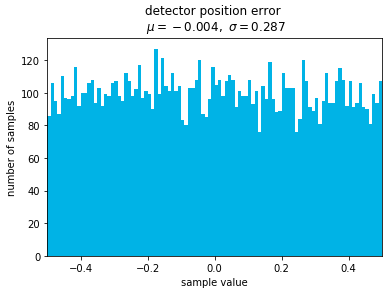

In [11]:
samples = np.random.uniform(-0.5, 0.5, size=10000)
plot_histogram2(samples)

For the case of **2(a)**, $x_{meas}=0$ (the center of the strip), so we can simply find the variance of these samples and take the square root to find the position resolution.  Note that this is really just a repetition of the first problem, but with our bounds shifted from (0,1) to (-0.5,0.5).

In [12]:
sigma_x = np.sqrt(np.var(samples))

print("position resolution = {0:.3f} using a Monte Carlo method".format(sigma_x))
print("position resolution = {0:.3f} using an analytical method".format(1/np.sqrt(12)))

position resolution = 0.287 using a Monte Carlo method
position resolution = 0.289 using an analytical method


For the case of **2(b)**, we need to consider the three different cases for $x_{meas}$.

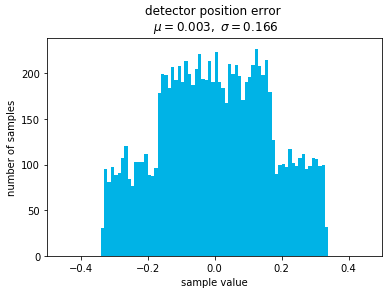

position resolution = 0.166 using a Monte Carlo method
position resolution = 0.167 using an analytical method


In [13]:
#We'll call the quantity (x_meas - x_true) the "error" of the measurement
errors = []

#Go through each of our random samples and append (x_meas - x_true) to the error list
for sample in samples:
    #particle hits the left third of strip
    if sample < -1/3:
        errors.append(-0.5 - sample)
    #particle hits the right third of strip
    elif sample > 1/3:
        errors.append(0.5 - sample)
    else:
        errors.append(0 - sample)

plot_histogram2(errors)

#Compare our position resolution to the analytical value of l/6
sigma_x = np.sqrt(np.var(errors))
print("position resolution = {0:.3f} using a Monte Carlo method".format(sigma_x))
print("position resolution = {0:.3f} using an analytical method".format(1/6))

**(b)** Now, let us replace our binary electronics from part 2(b) with analog electronics (so that the magnitude of the charge deposited on the strip is recorded).  We will model the transverse spreading of the charge from our incident
track using a Gaussian distribution with width $\sigma_M$: 

$$ f(x)\ dx = \frac{1}{\sigma_M\sqrt{2\pi}} \exp(-(x-x_0)^2/2\sigma_M^2)\ dx$$

where $f(x)$ is the charge deposited between position $x$ and $x+dx$ and $x_0$ is the point where the track hits the detector.
Assume that the total energy deposited by each track is 1 MIP (a MIP is the energy deposited by a single minimum ionizing particle), that our analog electronics has a threshold of 0.2 MIP and that $\sigma_M=\ell$.  Also assume that the electronics has an intrinsic noise contribution $\sigma_N=0.1$ MIP. (This means that the measurement of the charge on each strip is modified by adding a noise contribution that is distributed according
to a Gaussian with mean 0 and variance $\sigma_N^2$.  Assume that the
noise on neighboring strips is uncorrelated.)

Generate 10,000 particles and simulate the response of this
silcon strip detector (**using 7 strips now**) to these particles.  From this simulation
determine the position resolution of the silicon detector.
Assume that in the analysis of these data the measured position of the particle is:
$$
x_{meas} = \sum_{i=strips} q_i x_i
$$
where the index $i$ is the strip number, $q_i$ is the measured
charge on the strip (set to zero for strips with charge below
threshold) and $x_i$ is the position of the center of strip $i$.

Once again, assume that the incident particles have a uniform distribution
in $x$ with $-\ell/2 < x < \ell/2$.

**Answer** We'll take $\sigma_M = \ell = 1$ for simplicity.  To keep track of our detector geometry, we'll first create a list of each strip's centers along with a list of its left/right bounds.  

In [14]:
num_strips = 7  #Keep this odd so the problem is symmetric
centers = []
bounds = []

for i in range(-int(num_strips/2),int(num_strips/2)+1):
    centers.append(i)
    bounds.append([i-0.5, i+0.5])
    
print(centers, bounds)

[-3, -2, -1, 0, 1, 2, 3] [[-3.5, -2.5], [-2.5, -1.5], [-1.5, -0.5], [-0.5, 0.5], [0.5, 1.5], [1.5, 2.5], [2.5, 3.5]]


Next, we'll use the error function to integrate over the Gaussian distribution while finding the charge deposited on each strip.  We'll also implement the weighted sum in finding the measured position.

In [15]:
#Import the error function to help integrate the gaussian distribution
from math import erf

#Finds the charge deposited on strip i with a hit at location x
def get_charge(i,x):
    return((erf((bounds[i][1] - x)/np.sqrt(2)) - erf((bounds[i][0] - x)/np.sqrt(2)))/2)

#Finds the measured particle position                           
def find_xmeas(charges, cutoff):
    x_meas = 0
    #This for loop corresponds to the sum given in the problem statement
    for i in range(len(charges)):
        #Charge measurement is only considered if it exceeds the defined threshold
        if charges[i] > cutoff:
            x_meas += charges[i]*centers[i]
    return x_meas

Finally, we'll write a function that finds the position resolution for any intrinsic noise and charge threshold.

In [16]:
def test_analog_electronics(noise, cutoff):
    samples = np.random.uniform(-0.5,0.5, size=10000)
    errors = []
    for x_true in samples:
        #Calculate the charge deposited on each detector strip
        charges = []
        for i in range(num_strips):
            charges.append(get_charge(i,x_true))

        #Add intrinsic noise to the electronics
        charges += np.random.normal(0, noise, sample.size)

        #Find the measured position of the particle
        x_meas = find_xmeas(charges, cutoff)

        errors.append(x_meas - x_true)
    
    plot_histogram2(errors)

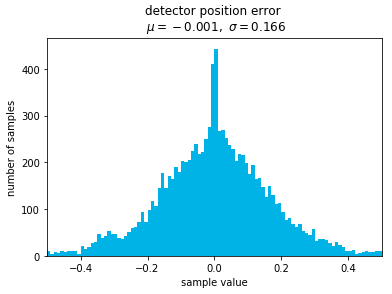

In [17]:
test_analog_electronics(0.1,0.2)

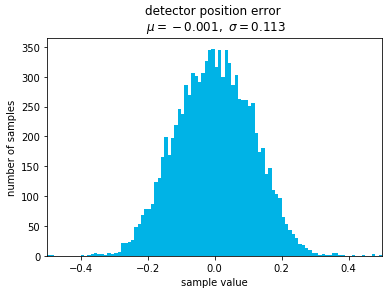

In [18]:
test_analog_electronics(0.05,0.2)